###***Data Preprocessing***


####***Import***


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


####***Information about dataset***

In [ ]:
dataset.shape

(5110, 12)

In [ ]:
dataset.index

RangeIndex(start=0, stop=5110, step=1)

In [ ]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

####***Correlation between each column and the target one*** 

In [ ]:
dataset[['gender', 'stroke']].groupby(['gender'], as_index=False).mean()

,gender,stroke
0,Female,0.047094
1,Male,0.051064
2,Other,0.000000


In [ ]:
dataset[['hypertension', 'stroke']].groupby(['hypertension'], as_index=False).mean()

,hypertension,stroke
0,0,0.039679
1,1,0.132530


In [ ]:
dataset[['heart_disease', 'stroke']].groupby(['heart_disease'], as_index=False).mean()

,heart_disease,stroke
0,0,0.041787
1,1,0.170290


In [ ]:
dataset[['ever_married', 'stroke']].groupby(['ever_married'], as_index=False).mean()

,ever_married,stroke
0,No,0.016505
1,Yes,0.065613


In [ ]:
dataset[['work_type', 'stroke']].groupby(['work_type'], as_index=False).mean()

,work_type,stroke
0,Govt_job,0.050228
1,Never_worked,0.000000
2,Private,0.050940
3,Self-employed,0.079365
4,children,0.002911


In [ ]:
dataset[['Residence_type', 'stroke']].groupby(['Residence_type'], as_index=False).mean()

,Residence_type,stroke
0,Rural,0.045346
1,Urban,0.052003


In [ ]:
dataset[['smoking_status', 'stroke']].groupby(['smoking_status'], as_index=False).mean()

,smoking_status,stroke
0,Unknown,0.030440
1,formerly smoked,0.079096
2,never smoked,0.047569
3,smokes,0.053232


####***Handling missing values***

In [ ]:
bmi_avg = dataset['bmi'].mean()
bmi_std = dataset['bmi'].std()
bmi_null_count = dataset['bmi'].isnull().sum()

rng = np.random.RandomState(42)
bmi_null_random_list = rng.uniform(bmi_avg - bmi_std, bmi_avg + bmi_std, size=bmi_null_count)
dataset['bmi'][np.isnan(dataset['bmi'])] = bmi_null_random_list

# dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].mean())
dataset['categorical_bmi'] = pd.cut(dataset['bmi'], 5)
dataset[['categorical_bmi', 'stroke']].groupby(['categorical_bmi'], as_index=False).mean()

,categorical_bmi,stroke
0,"(10.213, 27.76]",0.039692
1,"(27.76, 45.22]",0.057808
2,"(45.22, 62.68]",0.049296
3,"(62.68, 80.14]",0.000000
4,"(80.14, 97.6]",0.000000


####***Encoding labels***

In [ ]:
label_encoder = LabelEncoder()

label_encoder.fit(dataset['smoking_status'])
dataset['smoking_status'] = label_encoder.transform(dataset['smoking_status'])

label_encoder.fit(dataset['gender'])
dataset['gender'] = label_encoder.transform(dataset['gender'])

label_encoder.fit(dataset['Residence_type'])
dataset['Residence_type'] = label_encoder.transform(dataset['Residence_type'])

label_encoder.fit(dataset['work_type'])
dataset['work_type'] = label_encoder.transform(dataset['work_type'])

In [ ]:
dataset['ever_married'].loc[(dataset['ever_married'] == 'Yes')] = 1
dataset['ever_married'].loc[(dataset['ever_married'] == 'No')] = 0
dataset['ever_married'].value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

####***Handling an outlier***

In [ ]:
dataset.drop(dataset[dataset['gender'] == 'Other'].index, inplace = True)

####***Dropping unused columns***

In [ ]:
dataset.drop(columns=['categorical_bmi', 'id'], inplace=True)

In [ ]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,26.922496,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


####***Scaling numerical variables***

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [ ]:
dataset[['age', 'avg_glucose_level', 'bmi']] = standard_scaler.fit_transform(dataset[['age', 'avg_glucose_level', 'bmi']])
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0,1,1,2,1,2.706375,0.995432,1,1
1,0,0.786070,0,0,1,3,0,2.121559,-0.253025,2,1
2,1,1.626390,0,1,1,2,0,-0.005028,0.466507,2,1
3,0,0.255342,0,0,1,2,1,1.437358,0.711618,3,1
4,0,1.582163,1,0,1,3,0,1.501184,-0.630045,2,1


####***Categorising numerical variables and encoding them***

In [ ]:
dataset['age'] = pd.cut(dataset['age'], 5)
dataset['bmi'] = pd.qcut(dataset['bmi'], 5)
dataset['avg_glucose_level'] = pd.qcut(dataset['avg_glucose_level'], 5)

label_encoder.fit(dataset['age'])
dataset['age'] = label_encoder.transform(dataset['age'])

label_encoder.fit(dataset['bmi'])
dataset['bmi'] = label_encoder.transform(dataset['bmi'])

label_encoder.fit(dataset['avg_glucose_level'])
dataset['avg_glucose_level'] = label_encoder.transform(dataset['avg_glucose_level'])

dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4,0,1,1,2,1,4,4,1,1
1,0,3,0,0,1,3,0,4,2,2,1
2,1,4,0,1,1,2,0,3,3,2,1
3,0,2,0,0,1,2,1,4,3,3,1
4,0,4,1,0,1,3,0,4,1,2,1


###***Training the model***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import accuracy_score, log_loss, f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

import pickle
import json

In [ ]:
train = pd.read_csv('train.csv')
val  = pd.read_csv('val.csv')
full_data = [train, val]

In [ ]:
class DataLoader(object):
    def fit(self, dataset):
        self.dataset = dataset.copy()

    def load_data(self):
        # replace value
        self.dataset['ever_married'].loc[(self.dataset['ever_married'] == 'Yes')] = 1
        self.dataset['ever_married'].loc[(self.dataset['ever_married'] == 'No')] = 0

        # fill Nan with values from random distribution
        bmi_avg = self.dataset['bmi'].mean()
        bmi_std = self.dataset['bmi'].std()
        bmi_null_count = self.dataset['bmi'].isnull().sum()
        rng = np.random.RandomState(42)
        bmi_null_random_list = rng.uniform(bmi_avg - bmi_std, bmi_avg + bmi_std, size=bmi_null_count)
        self.dataset['bmi'][np.isnan(self.dataset['bmi'])] = bmi_null_random_list

        # dropping outliers
        # self.dataset.drop(self.dataset[self.dataset['gender'] == 'Other'].index, inplace=True)

        # drop columns
        self.dataset = self.dataset.drop(['id'], axis=1)

        # scaling numerical variables
        standard_scaler = StandardScaler()
        self.dataset[['age', 'avg_glucose_level', 'bmi']] = standard_scaler.fit_transform(
            self.dataset[['age', 'avg_glucose_level', 'bmi']])

        # encode labels
        label_encoder = LabelEncoder()

        label_encoder.fit(self.dataset['smoking_status'])
        self.dataset['smoking_status'] = label_encoder.transform(self.dataset['smoking_status'])

        label_encoder.fit(self.dataset['gender'])
        self.dataset['gender'] = label_encoder.transform(self.dataset['gender'])

        label_encoder.fit(self.dataset['Residence_type'])
        self.dataset['Residence_type'] = label_encoder.transform(self.dataset['Residence_type'])

        label_encoder.fit(self.dataset['work_type'])
        self.dataset['work_type'] = label_encoder.transform(self.dataset['work_type'])

        return self.dataset


In [ ]:
X_raw = train.drop("stroke", axis=1)

loader = DataLoader()
loader.fit(X_raw)
X = loader.load_data()
y = train["stroke"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Classifier,Accuracy
0,SVC,0.269154
0,LogisticRegression,0.306472


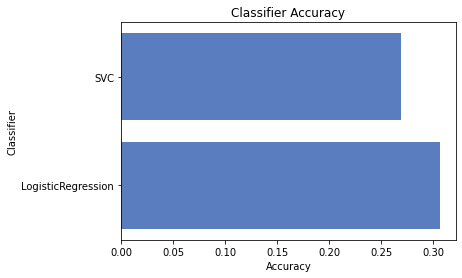

In [ ]:
classifiers = [
    SVC(class_weight={0:.1, 1:.90}, probability=True),
    LogisticRegression(class_weight={0:.14, 1:.86}, solver='liblinear', warm_start=True, multi_class='auto')
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = f1_score(y_test, train_predictions)
        
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns = log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = "b")
log


In [ ]:
svc = SVC()
param_grid_svc = {
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'probability': (True, False),
    'class_weight': ({0:.1, 1:.9}, {0:.15, 1:.85}, {0:.05, 1:.95}, {0:.13, 1:.87}, {0:.17, 1:.83}),
    'C': (0.85, 0.9, 1, 1.15),
    'gamma': ('scale', 'auto'),
    'decision_function_shape': ('ovo', 'ovr'),

}

clf_svc = GridSearchCV(svc, param_grid_svc, scoring=make_scorer(f1_score))
clf_svc.fit(X, y)

print(clf_svc.best_score_)
clf_svc.best_params_

In [ ]:
lg = LogisticRegression()

param_grid_lg = {
     'class_weight': ({0:.1, 1:.9}, {0:.15, 1:.85}, {0:.05, 1:.95}, {0:.13, 1:.87}, {0:.17, 1:.83}),
     'solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
     'multi_class': ('auto', 'ovr', 'multinomial'),
     'penalty': ('l1', 'l2', 'elasticnet', 'none'),
     'C': (0.85, 0.9, 1, 1.15),
     'warm_start': (True, False)
}

clf_lg = GridSearchCV(lg, param_grid_lg, scoring=make_scorer(f1_score))
clf_lg.fit(X, y)

print(clf_lg.best_score_)
clf_lg.best_params_

In [ ]:
print(clf_lg.best_score_)
clf_lg.best_params_

0.2870444092370758


{'C': 0.85,
 'class_weight': {0: 0.13, 1: 0.87},
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear',
 'warm_start': True}

In [ ]:
with open('specifications.json') as f:
    specifications = json.load(f)

raw_train = pd.read_csv('train.csv')
x_columns = specifications['description']['X']
y_column = specifications['description']['y']

X_raw = raw_train[x_columns]

loader = DataLoader()
loader.fit(X_raw)
X = loader.load_data()
y = raw_train['stroke']

model = LogisticRegression(class_weight={0:.14, 1:.86}, solver='liblinear', warm_start=True, multi_class='auto')
model.fit(X, y)
with open('LogisticRegression.pickle', 'wb')as f:
    pickle.dump(model, f)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
